In [237]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
print(dfiat)

        ID   model  engine_power  age_in_days      km  previous_owners  \
0        1  lounge            51          882   25000                1   
1        2     pop            51         1186   32500                1   
2        3   sport            74         4658  142228                1   
3        4  lounge            51         2739  160000                1   
4        5     pop            73         3074  106880                1   
...    ...     ...           ...          ...     ...              ...   
1533  1534   sport            51         3712  115280                1   
1534  1535  lounge            74         3835  112000                1   
1535  1536     pop            51         2223   60457                1   
1536  1537  lounge            51         2557   80750                1   
1537  1538     pop            51         1766   54276                1   

            lat        lon  price  
0     44.907242   8.611560   8900  
1     45.666359  12.241890   8800  
2  

In [238]:
dfiat=pd.read_csv("fiat500.csv")
print(dfiat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB
None


In [239]:
print(dfiat.shape)


(1538, 9)


In [240]:
dfiat1=dfiat.drop(columns=["ID","model","lat","lon"])
dfiat2=dfiat.drop(columns=["ID","lat","lon"])
print(dfiat1.corr().to_string())

                 engine_power  age_in_days        km  previous_owners     price
engine_power         1.000000     0.319190  0.285495        -0.005030 -0.277235
age_in_days          0.319190     1.000000  0.833890         0.075775 -0.893328
km                   0.285495     0.833890  1.000000         0.097539 -0.859373
previous_owners     -0.005030     0.075775  0.097539         1.000000 -0.076274
price               -0.277235    -0.893328 -0.859373        -0.076274  1.000000


In [241]:
dfiat['model'].unique()


array(['lounge', 'pop', 'sport'], dtype=object)

In [242]:
sportscar=dfiat2[dfiat2['model']=='sport']
print(sportscar.to_string())
print(sportscar.shape)


      model  engine_power  age_in_days      km  previous_owners  price
2     sport            74         4658  142228                1   4200
8     sport            73         4049   76000                1   5600
9     sport            51         3653   89000                1   6000
27    sport            51         3531  100000                1   4950
33    sport            51         3927  140000                2   5200
38    sport            51          790   43100                1   9950
40    sport            51         4139  119000                1   4890
48    sport            51         3684  160000                1   4900
49    sport            51         4596  107000                1   4300
51    sport            51          790   35000                1  10200
53    sport            62         3288   71900                1   5990
67    sport            51         4261  188000                1   4490
77    sport            51         2739   77149                3   7800
81    

In [243]:
dfsport=dfiat.loc[dfiat2["model"]=="sport"]
dflounge=dfiat.loc[dfiat2["model"]=="lounge"]
dfpop=dfiat.loc[dfiat2["model"]=="pop"]
print(dfsport.shape)
print(dflounge.shape)
print(dfpop.shape)

(86, 9)
(1094, 9)
(358, 9)


In [244]:
print(dfsport["km"].max())
print(dfsport["km"].min())
print(dfsport["km"].mean())

190000
6200
103382.80232558139


In [245]:
print(dfsport.describe().to_string())

                ID  engine_power  age_in_days             km  previous_owners        lat        lon         price
count    86.000000     86.000000    86.000000      86.000000        86.000000  86.000000  86.000000     86.000000
mean    724.406977     55.465116  3310.372093  103382.802326         1.267442  43.799563  11.436682   6275.406977
std     489.008610      8.210034  1165.134994   43041.072473         0.602435   2.126544   2.650824   1916.322860
min       3.000000     51.000000   517.000000    6200.000000         1.000000  38.112740   7.330990   3800.000000
25%     227.750000     51.000000  3020.750000   72425.000000         1.000000  41.757082   9.205970   4892.500000
50%     765.500000     51.000000  3684.000000  102400.000000         1.000000  45.013901  11.330880   5800.000000
75%    1082.000000     56.250000  4139.000000  129973.000000         1.000000  45.526340  13.233512   6900.000000
max    1534.000000     74.000000  4658.000000  190000.000000         4.000000  46.792019

In [246]:
x=dfsport.drop(columns=["ID","lat","lon","model","engine_power","price"])
y=dfsport['price']
print(x.to_string())
print(y.to_string())

      age_in_days      km  previous_owners
2            4658  142228                1
8            4049   76000                1
9            3653   89000                1
27           3531  100000                1
33           3927  140000                2
38            790   43100                1
40           4139  119000                1
48           3684  160000                1
49           4596  107000                1
51            790   35000                1
53           3288   71900                1
67           4261  188000                1
77           2739   77149                3
81           4292  145000                3
95           4292  165600                1
97           2009   86000                2
114          4018  102000                1
132          3988  175000                1
148          4383   74000                1
172          4077  124000                1
214          3592   99180                1
225          3896  120000                1
232        

In [247]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x,y)


LinearRegression()

In [248]:
ans=model.predict([[882,25000,1],[882,25000,1]])
print(ans)

[10090.97640147 10090.97640147]


In [249]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x,y)



LinearRegression()

In [250]:
# l=[]
# mod=str(input("Enter Model :"))
# rd=int(input("Enter num of cars :"))
# for i in range(1,rd+1):
#     var=list(map(int,input("Enter details of car :").split()))
#     l.append(var)
# if mod=="pop":
#     print(model.predict(l))
    
# elif mod=="lounge":
#     print(model.predict(l))
    
# else:
#     print(model.predict(l))
        
#for i in 
    

In [251]:
newdf=pd.get_dummies(dfiat,dtype=int)

x1=newdf.drop(columns=["ID","lat","lon","engine_power","price"])
y1=newdf['price']
print(x1.to_string())
print(y1.to_string())

      age_in_days      km  previous_owners  model_lounge  model_pop  model_sport
0             882   25000                1             1          0            0
1            1186   32500                1             0          1            0
2            4658  142228                1             0          0            1
3            2739  160000                1             1          0            0
4            3074  106880                1             0          1            0
5            3623   70225                1             0          1            0
6             731   11600                1             1          0            0
7            1521   49076                1             1          0            0
8            4049   76000                1             0          0            1
9            3653   89000                1             0          0            1
10            790   43286                1             0          1            0
11            366   17500   

In [252]:
newmodel=LinearRegression()
newmodel.fit(x1,y1)


LinearRegression()

In [253]:
print(newmodel.predict([[2000,40000,1,1,0,0]]))

[8584.80009693]


In [254]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23)

In [255]:
print(x_train.shape)
print(x_test.shape)

(66, 3)
(20, 3)


In [265]:
finalans=LinearRegression()
finalans.fit(x_train,y_train)
f=finalans.predict(x_test)
print(f)


[4365.02985515 4913.52485749 4245.0084676  4611.712847   7530.91888464
 4893.49377877 5774.42596179 6456.0894822  6016.22902582 6371.69994865
 8090.38393058 5500.9623304  7891.07679008 6624.32482868 9895.66564714
 6503.63333634 3934.13546861 5246.40037276 5387.68793177 6464.15904139]


In [277]:
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(x1,y1,test_size=0.15)
finalans = LinearRegression()
finalans.fit(X_train_2,Y_train_2)
ans2 = finalans.predict(X_test_2)
print(ans2)

[ 6512.85358817 10382.50769135  5647.41178736  7101.17890916
  9746.00946828  8872.69267983  7928.02888369  9708.74237922
  9773.40467022  5215.2125607  10305.47066186  9768.38988829
  9739.22755092  8180.41539545  9712.44717419 10393.27605041
  7961.097234    5999.44066945  9768.33845243  8944.42343961
  9228.94162524  8911.20721687  9276.10776554  9906.67484253
  9416.44700927  5864.56963067  9955.1530271   9933.08038039
  7253.86363211  5294.50689946  6427.77103455 10173.26527895
 10344.11618065 10424.60976448  5561.26270615  6549.12521446
 10085.84858338 10050.14230123  6147.68489339  9298.56516796
 10454.87674354  5855.91988222  6089.03756124  6434.30243526
  9033.54984813  6043.926754    6160.22332293  9774.96033518
 10095.792807   10409.51442568 10462.64660079 10279.54369173
  4340.84908382  6420.12678462  9655.02386419  7327.65477318
  9955.1530271   9287.6376775   9743.64943509  9809.66620531
  9027.51919977  8359.81099003  9731.60310865  6566.98966409
  9651.94831013  6879.20

In [259]:
import seaborn as sns
import matplotlib as plt


<Axes: xlabel='KM', ylabel='Price'>

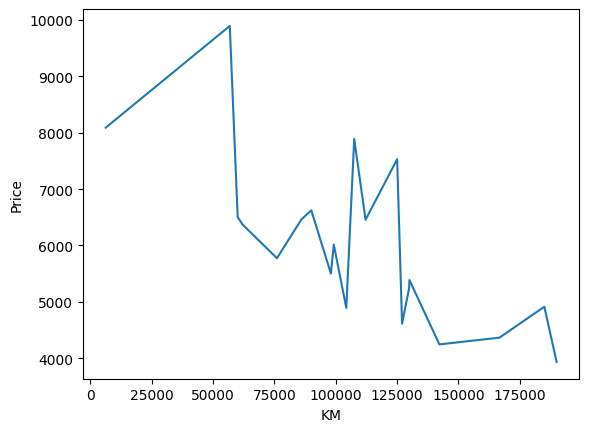

In [278]:
result=pd.DataFrame(columns=['KM','Price'])
result['KM']=x_test['km']
result['Price'] = f
sns.lineplot(x='KM',y="Price",data=result)


<Axes: xlabel='KM', ylabel='Price'>

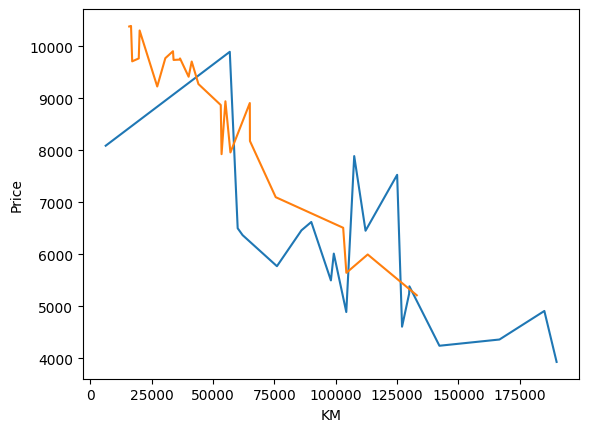

In [282]:
result1 = pd.DataFrame(columns=['KM','Price'])
result2 = pd.DataFrame(columns=['KM','Price'])
result1['KM'] = x_test['km']
result1['Price'] = f
result2['KM'] = X_test_2['km']
result2['Price'] = ans2
sns.lineplot(x='KM',y='Price',data=result1.head(25))
sns.lineplot(x='KM',y='Price',data=result2.head(25))